# The Spread of Forest Fires

This two-part tutorial illustrates different ways to model the spread of a fire among a certain forest. The parts, in brief, are as follows:

[Part 0]: We'll show how the spread of fire can be modeled over a geometric region using cellular automata (CA).

[Part 1]: We'll extend the CA model to a stochastic Markov chain model, which considers the effects of the wind, river, lake and extinguishment on the spread of fires.

[Part 2]: This part explains how to use and implement a reaction-diffusion model for forest fire spread.

## Part 0: A cellular automata model# 

In the first part of this tutorial, we'll apply the concept of cellular automata to the modeling of fire spread.

### The phenomenon to be modeled and simulated 


We model the spread of fire in forest with geographically randomly distributed trees. To simplify the system, we assume that trees are distributed randomly with a given probability, p, among a square-shaped geographical area. For examply, p = 0 means there are no trees in the space, whereas p = 1 means trees are everywhere with no open space left in the area. If 0<p<1, then we have some space with trees and the other is open space. Then, we set fire randomly to one of the trees in this forest to see if the fire started by the model eventually destroys the entire forest. A tree will catch fire if there is at least one tree burning in its neighborhood, and the burning tree will be charred completely after one time step.

As a first cut, let's try using a cellular automaton (CA) as the conceptual model. 




#### Quiz 1-Please list the possible states in the model.

In [ ]:
# Possible states:
EMPTY_SITE = 0,
ALIVE_TREE = 1,
BURNT_TREE = 2

#### Quiz 2-Please create a square-shaped domain with randomly distributed trees for a given probability p = 0.7.

Following the above states, we start with a 10 by 10 grid with randomly picked state (0 or 1) for each cell. 

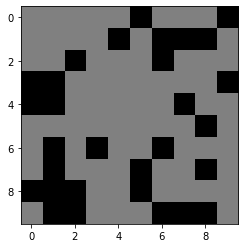

In [5]:
import numpy as np
import copy
import random
import matplotlib.pyplot as plt
mat = np.zeros ((5, 5))

m=10
n=10
Graph=np.zeros([m,n],int)
forest_ratio=0.7
fire_candidates=[]

for i in range(m):
    for j in range(n):
        rd=np.random.randint(0,100)/100
        #print(rd)
        if rd<forest_ratio:
            Graph[i][j]=1
            fire_candidates.append((i,j))
        else:
            Graph[i][j]=0
plt.imshow(Graph,cmap = 'gray',interpolation='nearest',vmin=0,vmax=2)
plt.show()

The above graph shows a 10 by 10 grid space with black cell denoting empty site and grey cell denoting alive tree.

Note that this model doesn’t have cyclic local dynamics; possible state transitions are always one way from a tree (1) to a burnt tree (2), which is different from the dynamics models. So the whole system eventually falls into a static final configuration with no further changes possible.



#### Quiz 3-Find the transition status and final status of the system.

In [9]:

T=0
fire=random.choice(fire_candidates)
#print (fire)

in_fire=[fire]
directions=[(-1,0),(1,0),(0,1),(0,-1)]
while in_fire:
    for _ in range(len(in_fire)):
        x,y=in_fire.pop(0)
        Graph[x][y]=-1
        for dir in directions:
            nx,ny=x+dir[0],y+dir[1]
            if 0<=nx<m and 0<=ny<n and Graph[nx][ny]==1:
                in_fire.append((nx,ny))
        T+=1
    if not T%10==1:
        print("Time step", T)
        plt.imshow(Graph,cmap = 'gray',interpolation='nearest',vmin=0,vmax=2)
        plt.show()
        


The results as shown above tells that the system reaches the final (static) status after several hundred time steps. Addtionally, black cell denotes empty site; grey cell denotes alive tree; white cell denotes burnt tree.

But the total area burned in the final onfiguration greatly depends on the density of trees p. If you start with a sufficiently large value of p, you will see that a significant portion of the forest will be burned down eventually. This phenomenon is called percolation in statistical physics, which intuitively eans that something found a way to go through a large portion of material from one side to the other.

#### Quiz 4-Please create a 100 by 100 grid for the system and answer the following questions.
1. Compare the final results for different values of p.
2. Plot the total burned area as a function of p.
3. Plot the time until the fire stops spreading as a function of p.

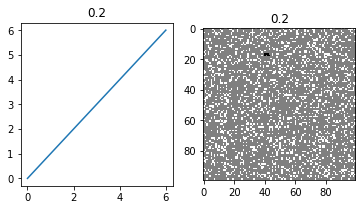

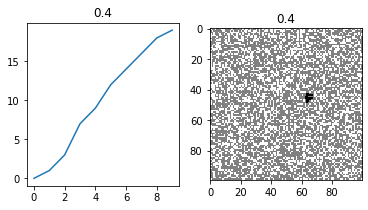

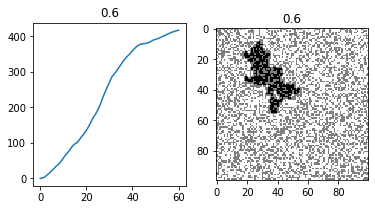

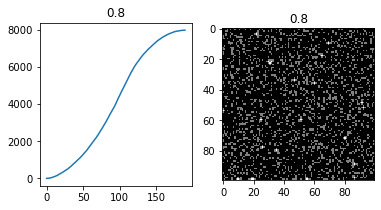

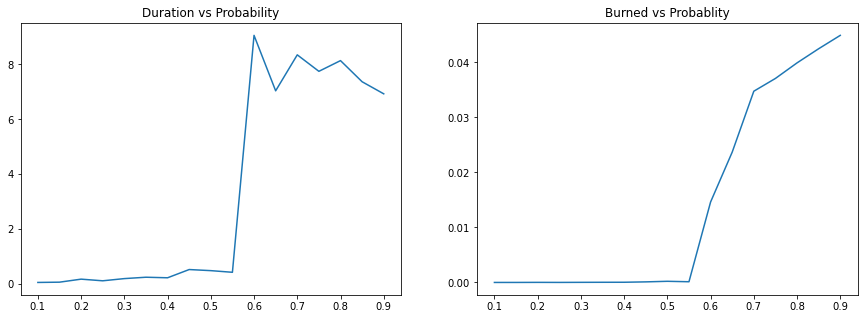

In [26]:
import numpy as np
import copy
import random
import matplotlib.pyplot as plt

class Solution: 
    def __init__(self):
        self.burned_area_his=[]
        self.burned_area=[]
        self.duration=[]
        self.final=[]
        self.prob=[]

    def forest_fire(self,m,n,p):
        #0：no-fuel    1:fuel    2:burned
        Graph=np.zeros([m,n],int)
        forest_ratio=p
        fire_candidates=[]
        burned_area=[0]
        for i in range(m):
            for j in range(n):
                rd=np.random.randint(0,100)/100
                #print(rd)
                if rd<forest_ratio:
                    Graph[i][j]=1
                    fire_candidates.append((i,j))
                else:
                    Graph[i][j]=0
        # print(Graph)
        
        T=0
        fire=random.choice(fire_candidates)
        #print (fire)
        
        in_fire=[fire]
        directions=[(-1,0),(1,0),(0,1),(0,-1)]
        while in_fire:
            burned_area.append(burned_area[-1]+len(in_fire))
            for _ in range(len(in_fire)):
                x,y=in_fire.pop(0)
                Graph[x][y]=-1
                for dir in directions:
                    nx,ny=x+dir[0],y+dir[1]
                    if 0<=nx<m and 0<=ny<n and Graph[nx][ny]==1:
                        Graph[nx][ny]=2
                        in_fire.append((nx,ny))
            T+=1
            #print(T)
            # if T<10:
            #     # print(T,Graph)
            #     plt.figure()
            #     plt.imshow(Graph,cmap = 'gray',interpolation='nearest')

        self.burned_area_his.append(burned_area)
        self.burned_area.append(burned_area[-1]/m/n)
        self.duration.append(T) 
        self.final.append(Graph)  
    def repeat(self,num,m,n,p):
        self.prob.append(p)
        burned_area=0
        duration=0
        for _ in range(num):
            self.forest_fire(m,n,p)
            burned_area+=self.burned_area.pop(-1)
            duration+=self.duration.pop(-1)
        self.burned_area.append(burned_area/n)
        self.duration.append(duration/n)
        if p in {0.2,0.4,0.6,0.8}:
            plt.figure()
            plt.subplot(1,2,1)
            x=np.arange(1,self.duration[-1],1)
            plt.plot(self.burned_area_his[-1])
            plt.title(p)
            plt.subplot(1,2,2)
            plt.imshow(self.final[-1],cmap = 'gray',interpolation='nearest')
            plt.title(p)
            fig=plt.gcf()
            fig.set_size_inches(6,3)
        
    def main(self):
        forest_ratios=[0.1+i*0.05 for i in range(17)]
        for p in forest_ratios:
            self.repeat(5,100,100,p)
        plt.figure()
        plt.subplot(1,2,1)
        plt.plot(test.prob,test.duration)
        plt.title("Duration vs Probability")
        plt.subplot(1,2,2)
        plt.plot(test.prob,test.burned_area)
        plt.title("Burned vs Probablity")
        fig=plt.gcf()
        fig.set_size_inches(15,5)
        
        
        
test=Solution()
test.main()

plt.show()        

The next analytical method is for studying critical thresholds for forest fire CA model. The percolation threshold may be estimated analytically by a method called renormalization group analysis. This is a serious mathematical technique developed and used in quantum and statistical physics. Here, we specifically focus on the basic idea of the analysis and how it can be applied to specific CA models. The following is the detailed steps for this analysis.

1. Define a property of a “portion” of the forest fire system, which is defined as the probability for a portion to conduct a fire from one side to another side through it;

2. Calculate the property at the smallest scale, $q_1$ = $p$. This is usually at the single-cell level, which should be immediately obtainable from a model parameter;

3. Derive a mathematical relationship between the property at the smallest scale, $q_1$, and the same property at a one-step larger scale, $q_2$ = $\Phi (q_1)$. This derivation is done by using single cells as building blocks to describe the process at a larger scale (e.g., two-by-two blocks);
\begin{align}
\Phi (q_{1})  & = q_{1} ^{4} + 4 q_{1} ^{3} (1-q_{1}) + 4 q_{1} ^{2} (1-q_{1} ^{2})\\
\end{align}

4. Assume that the relationship derived above can be applied to predict the property at even larger scales, and then study the asymptotic behavior of the iterative map $q_{s+1}$ = $\Phi (q_s)$ when scale s goes to infinity.



#### Quiz 5-Estimate the critical percolation threshold for the forest fire model. Hint: use a Cobweb plot.

In [2]:
import numpy as np
from scipy.optimize import fsolve

def myFunction(x):
   F = x**4 + 4*x**3*(1-x) + 4*x**2*(1-x)**2 - x
   return F


x = fsolve(myFunction,0.5)
print('pc=',x)

pc= [0.38196601]


So, the bottom line is, if the tree density in the forest is below 38%, the burned area will remain small, but if it is above 38%, almost the entire forest will be burned down. 